## Data Analysis and Visualisation
**Importing relevant libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Reads a comma-separated value into dataFrame**

In [2]:
query = pd.read_csv('dataset/clean_data.csv')

**Viewing the dataset**

In [3]:
query.head()

,Unnamed: 0,ques_link,vote_count,answer_count,ques_title,ques_summ,keywords,date
0,0,"""/questions/11227809/why-is-processing-a-sorte...",26265,28,Why is processing a sorted array faster than p...,Here is a piece of C++ code that shows some ve...,"['java', 'c++', 'performance', 'cpu-architectu...",2012-06-27
1,1,"""/questions/927358/how-do-i-undo-the-most-rece...",24035,98,How do I undo the most recent local commits in...,I accidentally committed the wrong files to Gi...,"['git', 'version-control', 'git-commit', 'undo']",2010-06-30
2,2,"""/questions/2003505/how-do-i-delete-a-git-bran...",18997,41,How do I delete a Git branch locally and remot...,I want to delete a branch both locally and rem...,"['git', 'version-control', 'git-branch', 'git-...",2010-01-05
3,3,"""/questions/292357/what-is-the-difference-betw...",13069,38,What is the difference between 'git pull' and ...,What are the differences between git pull and ...,"['git', 'version-control', 'git-pull', 'git-fe...",2008-11-15
4,4,"""/questions/231767/what-does-the-yield-keyword...",11895,47,"What does the ""yield"" keyword do?",What is the use of the yield keyword in Python...,"['python', 'iterator', 'generator', 'yield', '...",2008-10-23


**Dropping the "Unnamed: 0" column from the dataset**

In [4]:
query.drop('Unnamed: 0',axis=1,inplace=True)

**Viewing the updated dataset**

In [5]:
query.head()

,ques_link,vote_count,answer_count,ques_title,ques_summ,keywords,date
0,"""/questions/11227809/why-is-processing-a-sorte...",26265,28,Why is processing a sorted array faster than p...,Here is a piece of C++ code that shows some ve...,"['java', 'c++', 'performance', 'cpu-architectu...",2012-06-27
1,"""/questions/927358/how-do-i-undo-the-most-rece...",24035,98,How do I undo the most recent local commits in...,I accidentally committed the wrong files to Gi...,"['git', 'version-control', 'git-commit', 'undo']",2010-06-30
2,"""/questions/2003505/how-do-i-delete-a-git-bran...",18997,41,How do I delete a Git branch locally and remot...,I want to delete a branch both locally and rem...,"['git', 'version-control', 'git-branch', 'git-...",2010-01-05
3,"""/questions/292357/what-is-the-difference-betw...",13069,38,What is the difference between 'git pull' and ...,What are the differences between git pull and ...,"['git', 'version-control', 'git-pull', 'git-fe...",2008-11-15
4,"""/questions/231767/what-does-the-yield-keyword...",11895,47,"What does the ""yield"" keyword do?",What is the use of the yield keyword in Python...,"['python', 'iterator', 'generator', 'yield', '...",2008-10-23


**Viewing the data types of all columns**

In [6]:
query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 0 to 4974
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ques_link     4975 non-null   object
 1   vote_count    4975 non-null   int64 
 2   answer_count  4975 non-null   int64 
 3   ques_title    4975 non-null   object
 4   ques_summ     4975 non-null   object
 5   keywords      4975 non-null   object
 6   date          4975 non-null   object
dtypes: int64(2), object(5)
memory usage: 272.2+ KB


**Changing the data type of date to datetime**

In [7]:
query['date']=query['date'].astype('datetime64')

**Viewing the updated data type**

In [8]:
query.dtypes

ques_link               object
vote_count               int64
answer_count             int64
ques_title              object
ques_summ               object
keywords                object
date            datetime64[ns]
dtype: object

**Number of questions asked in each year**

In [9]:
pd.DatetimeIndex(query['date']).year.value_counts()

2009    1119
2010    1052
2011     721
2008     698
2012     538
2013     372
2014     189
2015     126
2016      88
2017      38
2018      21
2019       8
2020       3
2021       2
Name: date, dtype: int64

**Change the keywords column into meaningful data**

In [10]:
import ast

In [11]:
def convert(obj):
    list1 =[]
    for i in range(0, len(obj)):
        list1.append(ast.literal_eval(obj[i]))
    return list1

In [12]:
query['keywords'] = convert(query['keywords'])

**Countplot for questions asked each year**

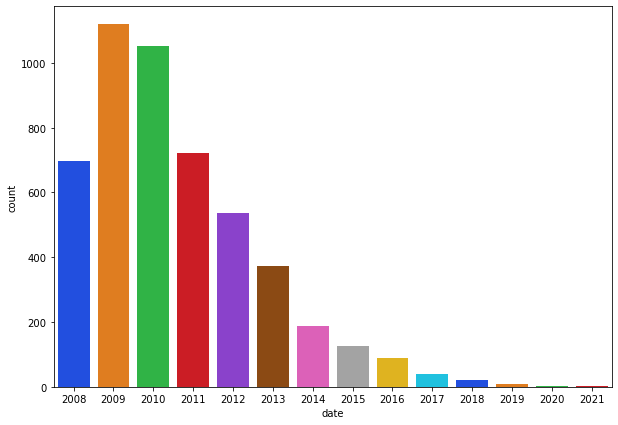

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x=pd.DatetimeIndex(query['date']).year,palette='bright')
plt.show()

**Number of rows with vote count greater than 3000**

In [14]:
len(query[query['vote_count'] > 3000])

204

**Top 5 questions with highest "vote_count"**

In [15]:
query.sort_values('answer_count',ascending = False).head()

,ques_link,vote_count,answer_count,ques_title,ques_summ,keywords,date
1562,"""/questions/1995113/strangest-language-feature""",973,320,Strangest language feature,"What is, in your opinion, the most surprising,...","[language-agnostic, programming-languages]",2010-06-30
793,"""/questions/9033/hidden-features-of-c""",1473,296,Hidden Features of C#? [closed],This came to my mind after I learned the follo...,"[c#, hidden-features]",2010-06-30
826,"""/questions/1711/what-is-the-single-most-influ...",1438,214,What is the single most influential book every...,If you could go back in time and tell yourself...,[resources],2010-06-30
838,"""/questions/101268/hidden-features-of-python""",1417,191,Hidden features of Python [closed],What are the lesser-known but useful features ...,"[python, hidden-features]",2010-06-30
2024,"""/questions/84556/whats-your-favorite-programm...",836,135,"What's your favorite ""programmer"" cartoon?",Personally I like this one:\r\r\nP.S. Do not h...,[language-agnostic],2010-06-30


**plotting "vote_count" vs "answer_count"**

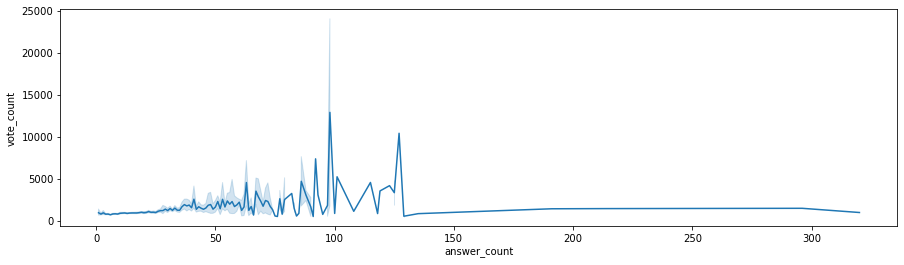

In [16]:
plt.figure(figsize=(15,4))
sns.lineplot(x='answer_count',y='vote_count',data=query)
plt.show()

**Convert the column keywords to a single list**

In [17]:
list1 =[] 
for i in range(0, len(query)):
    for i in query['keywords'][i]:
        list1.append(i)

In [18]:
list1

['java',
 'c++',
 'performance',
 'cpu-architecture',
 'branch-prediction',
 'git',
 'version-control',
 'git-commit',
 'undo',
 'git',
 'version-control',
 'git-branch',
 'git-push',
 'git-remote',
 'git',
 'version-control',
 'git-pull',
 'git-fetch',
 'python',
 'iterator',
 'generator',
 'yield',
 'coroutine',
 'json',
 'rest',
 'http-headers',
 'mime-types',
 'content-type',
 'javascript',
 'arrays',
 'git',
 'undo',
 'git-revert',
 'git-add',
 'git',
 'version-control',
 'git-branch',
 'c',
 'operators',
 'code-formatting',
 'standards-compliance',
 'memory-management',
 'stack',
 'language-agnostic',
 'dynamic-memory-allocation',
 'heap-memory',
 'json',
 'comments',
 'git',
 'version-control',
 'overwrite',
 'git-pull',
 'git-fetch',
 'html',
 'browser',
 'background-color',
 'javascript',
 'jquery',
 'dom',
 'visibility',
 'javascript',
 'syntax',
 'jslint',
 'use-strict',
 'git',
 'git-checkout',
 'remote-branch',
 'javascript',
 'jquery',
 'redirect',
 'git',
 'git-commit',


**Convert list to dataframe**

In [19]:
new_df = pd.DataFrame(list1,columns=['Skill'])

**Find the top 10 Most queried skill related data**

In [20]:
new_df.Skill.value_counts().head(10)

javascript    738
python        670
git           495
java          386
c#            293
html          257
android       228
string        215
css           214
jquery        200
Name: Skill, dtype: int64

**Plotting the top 10 most queried skills**

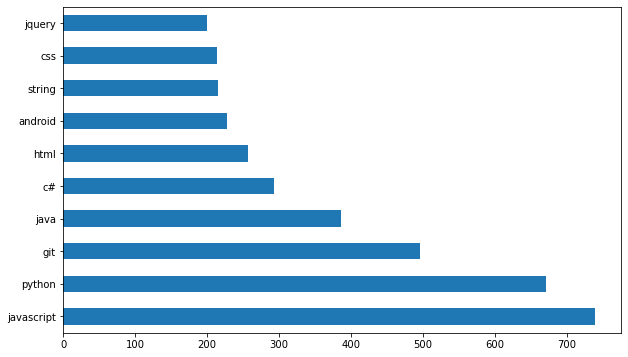

In [21]:
plt.figure(figsize=(10,6))
new_df['Skill'].value_counts().head(10).plot(kind = 'barh')
plt.show()

In [22]:
#task done